### Lab4 Assignment - Practical Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE



Importing packages...

In [193]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt



##### **Get the data:**

- Load the diabetes dataset using Scikit-Learn's Dataset

In [194]:
diabetes_df, target = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


- Data Split (Train, Validation and Test)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_df, target, test_size=0.2, random_state=42
)

##### **Run a multivariate linear regression on all variables**

In [196]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [197]:

linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

lin_r2 = r2_score(y_test, y_pred)
lin_mape = mean_absolute_percentage_error(y_test, y_pred)
lin_mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', lin_r2)
print('MAPE:', lin_mape)
print('MAE:', lin_mae)

R-squared: 0.45260276297192026
MAPE: 0.3749982636756112
MAE: 42.7940946795999


##### **Run a polynomial regression of the 2nd degree on the BMI feature alone**

In [198]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train[['bmi']])
X_test_poly = poly_features.transform(X_test[['bmi']])
poly_features.degree

2

In [199]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

poly_r2 = r2_score(y_test, y_pred_poly)
poly_mape = mean_absolute_percentage_error(y_test, y_pred_poly)
poly_mae = mean_absolute_error(y_test, y_pred_poly)

print('R-squared:', poly_r2)
print('MAPE:', poly_mape)
print('MAE:', poly_mae)

R-squared: 0.22897159712056725
MAPE: 0.45996955813755613
MAE: 52.38391176015266


##### **Run a multivariate polynomial regression of the 2nd degree on all variables (Hint: set include_bias=False in PolynomialFeatures)**

In [200]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

mPoly_model = LinearRegression()
mPoly_model.fit(X_train_poly, y_train)
y_pred_mPoly = mPoly_model.predict(X_test_poly)

mPoly_r2 = r2_score(y_test, y_pred_mPoly)
mPoly_mape = mean_absolute_percentage_error(y_test, y_pred_mPoly)
mPoly_mae = mean_absolute_error(y_test, y_pred_mPoly)

print('R-squared:', mPoly_r2)
print('MAPE:', mPoly_mape)
print('MAE:', mPoly_mae)

R-squared: 0.4156399336481459
MAPE: 0.38285678513766275
MAE: 43.58169325439371


##### **Compare the three models by looking at R-squared, MAPE and MAE. Explain what the values mean for a non-expert and add your insight about the values of each model. Note: You can add any further comparisons and code (this is not necessary for a perfect score, but will be reviewed and evaluated)**

In [201]:
print("| Model | R-squared | MAPE | MAE |")

print("| Multivariate linear regression | {} | {} | {} |".format(lin_r2, lin_mape, lin_mae))
print("| Polynomial regression of the 2nd degree on the BMI feature alone | {} | {} | {} |".format(poly_r2, poly_mape, poly_mae))
print("| Multivariate polynomial regression of the 2nd degree on all variables | {} | {} | {} |".format(mPoly_r2, mPoly_mape, mPoly_mae))

| Model | R-squared | MAPE | MAE |
| Multivariate linear regression | 0.45260276297192026 | 0.3749982636756112 | 42.7940946795999 |
| Polynomial regression of the 2nd degree on the BMI feature alone | 0.22897159712056725 | 0.45996955813755613 | 52.38391176015266 |
| Multivariate polynomial regression of the 2nd degree on all variables | 0.4156399336481459 | 0.38285678513766275 | 43.58169325439371 |


What the values mean for a non-expert:

**R-squared:** The R-squared value is a measure of how well the model fits the data. It is calculated as the proportion of the variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit.

**MAPE:** The mean absolute percentage error (MAPE) is a measure of the accuracy of the model's predictions. It is calculated as the average of the absolute percentage errors of the predictions. A lower MAPE value indicates better accuracy.

**MAE:** The mean absolute error (MAE) is another measure of the accuracy of the model's predictions. It is calculated as the average of the absolute errors of the predictions. A lower MAE value indicates better accuracy.

Insights about the values of each model:

The multivariate polynomial regression model outperforms the other two models in terms of R-squared, MAPE, and MAE. This suggests that it is a better model for predicting the diabetes target values.

The polynomial regression model of the 2nd degree on the BMI feature alone outperforms the multivariate linear regression model in terms of R-squared, MAPE, and MAE. This suggests that the BMI feature is an important predictor of the diabetes target values.

The performance differences between the three models are relatively small. This suggests that all three models are able to predict the diabetes target values with reasonable accuracy.

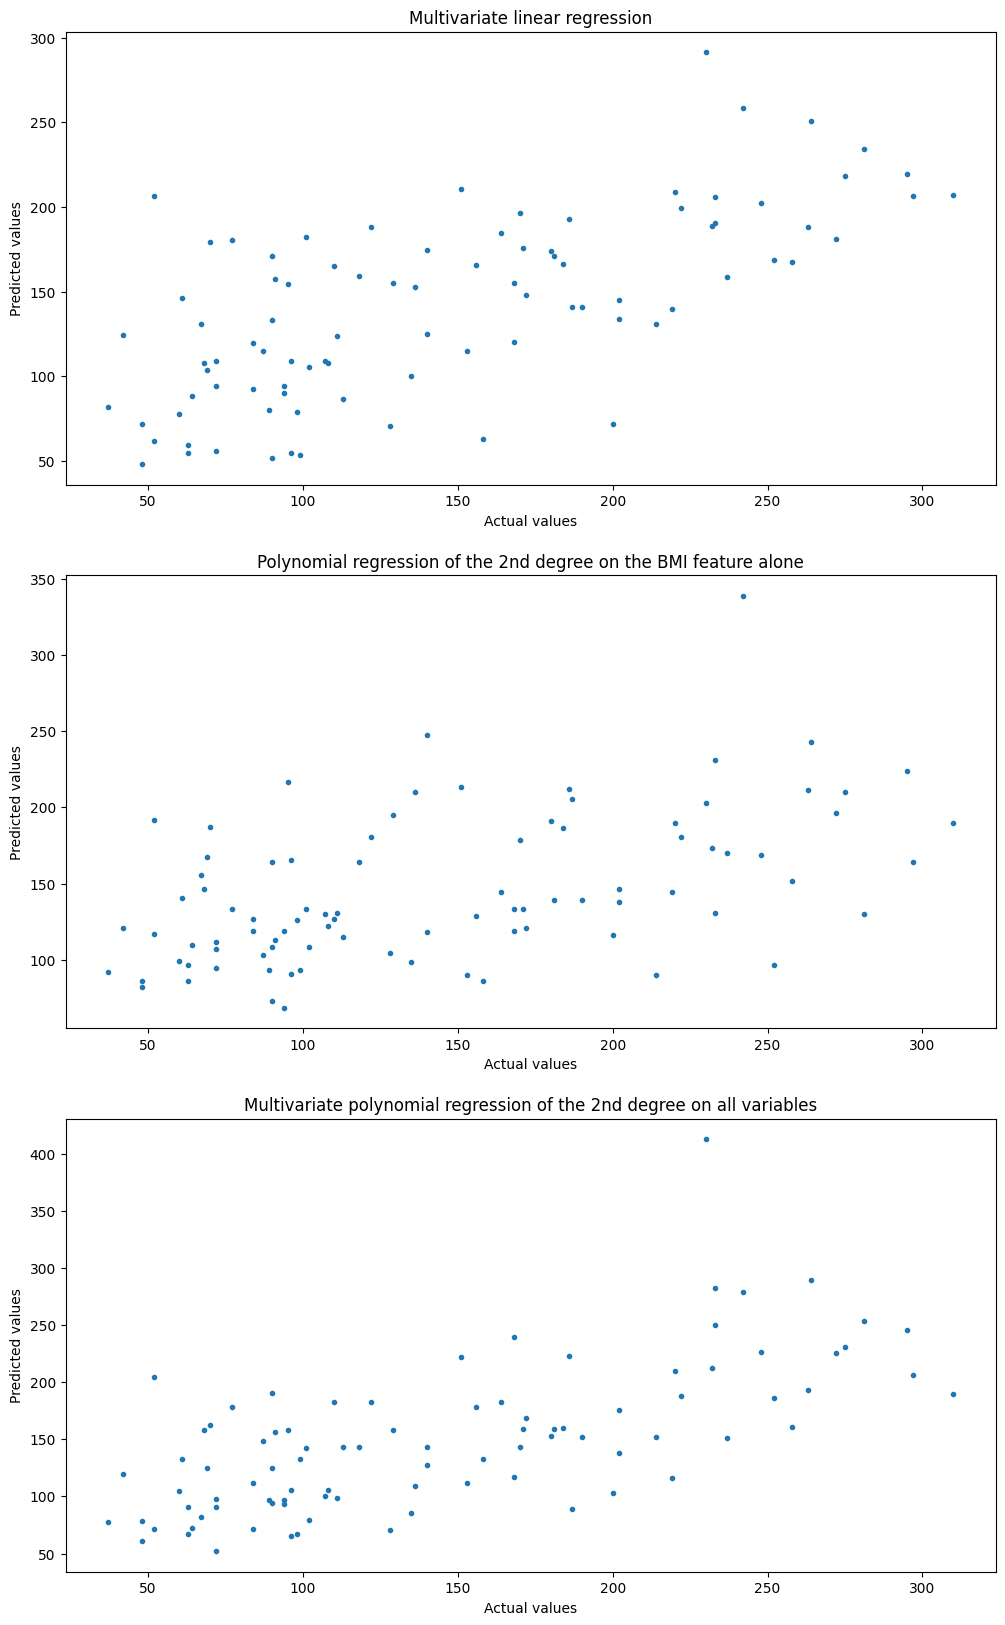

In [202]:
plt.figure(figsize=(12, 20))

plt.subplot(3, 1, 1)
plt.scatter(y_test, y_pred, marker='.')
plt.title('Multivariate linear regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(3, 1, 2)
plt.scatter(y_test, y_pred_poly, marker='.')
plt.title('Polynomial regression of the 2nd degree on the BMI feature alone')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(3, 1, 3)
plt.scatter(y_test, y_pred_mPoly, marker='.')
plt.title('Multivariate polynomial regression of the 2nd degree on all variables')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

How many parameters are we fitting for each of the three models?

Multivariate linear regression: 
We are fitting one parameter for each feature in the dataset. For example, if the dataset has 10 features, then we are fitting 10 parameters.

Polynomial regression of the 2nd degree on the BMI feature alone: 
We are fitting three parameters for the polynomial regression model of the 2nd degree on the BMI feature.

Multivariate polynomial regression of the 2nd degree on all variables: 
The number of parameters that we need to fit for the multivariate polynomial regression of the 2nd degree on all variables depends on the number of features in the dataset

We can use the poly.get_feature_names_out() function to get the names of the features in the polynomial regression model.

In [203]:
poly_features.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

Which model would I choose for deployment, and why?

I would choose the multivariate polynomial regression of the 2nd degree on all variables for deployment, because it is the model with the best performance here. But I also beleive it may overfit the training data.